# Q2


## Data

In [8]:
import pandas as pd

claim_data = pd.read_csv('claim_data_group5_2024.csv')
print("Missing values:\n", claim_data.isnull().sum())
claim_data = claim_data.dropna()
claim_data = claim_data[(claim_data['ClaimNb'] >= 0) & (claim_data['ClaimAmount'] >= 0)]
print(claim_data[['ClaimNb', 'ClaimAmount']].describe())


Missing values:
 IDpol          0
ClaimNb        0
Exposure       0
Area           0
VehPower       0
VehAge         0
DrivAge        0
BonusMalus     0
VehBrand       0
VehGas         0
Density        0
Region         0
ClaimAmount    0
dtype: int64
             ClaimNb    ClaimAmount
count  100000.000000  100000.000000
mean        0.039020      76.599887
std         0.206296    1531.841302
min         0.000000       0.000000
25%         0.000000       0.000000
50%         0.000000       0.000000
75%         0.000000       0.000000
max         4.000000  200000.000000


## Fit Frequency Distribution

Estimated Negative Binomial parameters:
Alpha (dispersion parameter): 1.0646657571623466
P (probability of success): 1.0


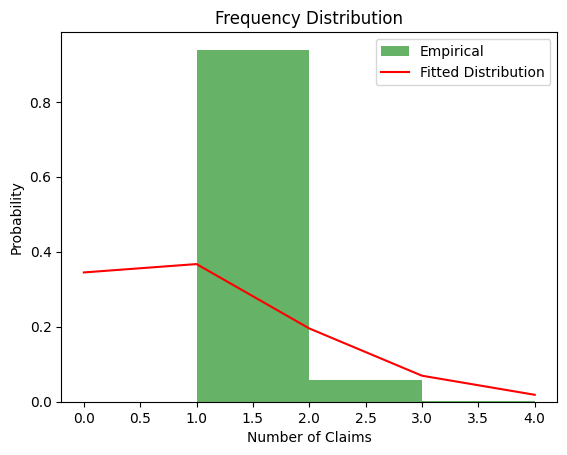

In [17]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

claim_data = pd.read_csv('claim_data_group5_2024.csv')
claim_data = claim_data.dropna()
claim_data = claim_data[(claim_data['ClaimNb'] >= 0) & (claim_data['ClaimAmount'] > 0)]  # Ensure ClaimAmount > 0
claim_frequency = claim_data['ClaimNb']
mean_claim_freq = claim_frequency.mean()
var_claim_freq = claim_frequency.var()
if var_claim_freq > mean_claim_freq:
    alpha_est = mean_claim_freq**2 / (var_claim_freq - mean_claim_freq)
    p_est = mean_claim_freq / var_claim_freq
else:
    alpha_est = mean_claim_freq
    p_est = 1.0

print("Estimated Negative Binomial parameters:")
print("Alpha (dispersion parameter):", alpha_est)
print("P (probability of success):", p_est)

# Plot 
plt.hist(claim_frequency, bins=range(0, int(claim_frequency.max()) + 1), density=True, alpha=0.6, color='g', label='Empirical')

x = np.arange(0, int(claim_frequency.max()) + 1)
if var_claim_freq > mean_claim_freq:
    fitted_nb = stats.nbinom.pmf(x, alpha_est, p_est)
else:
    fitted_nb = stats.poisson.pmf(x, alpha_est)
plt.plot(x, fitted_nb, 'r-', label='Fitted Distribution')

plt.title('Frequency Distribution')
plt.xlabel('Number of Claims')
plt.ylabel('Probability')
plt.legend()
plt.show()

Here we estimated the dispersion parameter Alpha, which is 1.0646657571623466, it shows there's a high tendency of dispersion but the alphais around 1 shows the distpersion is not extremely high. And the probality of success is 1.0 means it follows a poisson distribution.

 ## Simulated loss （Gamma）
 

According to the simulation, the average total expected loss in a year would be 2000.56 with a standard deviation of 3676.91, indicating a high degree of volatility in the total loss.

Estimated Gamma parameters for severity distribution:
Alpha: 0.77598083307877
Loc: 0
Beta: 2693.4142535413143


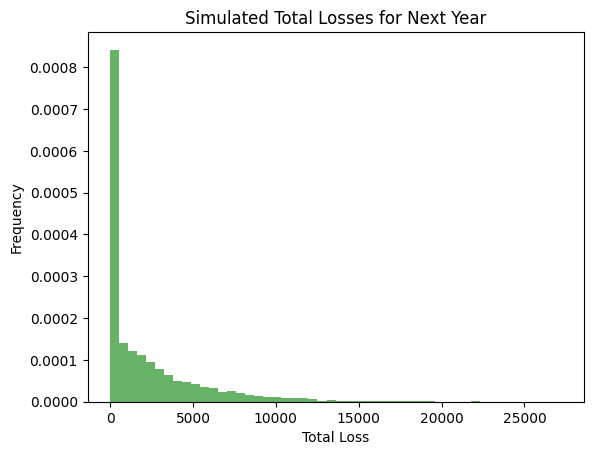

Simulated Total Losses - Mean: 2195.6363366800383
Simulated Total Losses - Std Dev: 3176.261629979459
KS Test for Gamma Distribution - Statistic: 0.24645803383389342 P-value: 1.5089949709438602e-196


In [18]:
# Severity distribution
claim_severity = claim_data['ClaimAmount']
alpha_sev, loc_sev, beta_sev = stats.gamma.fit(claim_severity, floc=0)

print("Estimated Gamma parameters for severity distribution:")
print("Alpha:", alpha_sev)
print("Loc:", loc_sev)
print("Beta:", beta_sev)

# Simulate total losses for the next year
num_simulations = 10000
total_losses = []

for _ in range(num_simulations):
    if var_claim_freq > mean_claim_freq:
        simulated_claims = np.random.negative_binomial(alpha_est, p_est)
    else:
        simulated_claims = np.random.poisson(alpha_est)
    
   
    simulated_severity = np.random.gamma(alpha_sev, beta_sev, simulated_claims)
    
    #  total loss
    total_loss = simulated_severity.sum()
    total_losses.append(total_loss)

# Convert to numpy array
total_losses = np.array(total_losses)

# Plot 
plt.hist(total_losses, bins=50, density=True, alpha=0.6, color='g')
plt.title('Simulated Total Losses for Next Year')
plt.xlabel('Total Loss')
plt.ylabel('Frequency')
plt.show()
print("Simulated Total Losses - Mean:", total_losses.mean())
print("Simulated Total Losses - Std Dev:", total_losses.std())
ks_stat, p_value = stats.kstest(claim_severity, 'gamma', args=(alpha_sev, loc_sev, beta_sev))
print("KS Test for Gamma Distribution - Statistic:", ks_stat, "P-value:", p_value)

 ## Simulated loss (log-nomal)
 

Estimated Log-Normal parameters for severity distribution:
Shape: 1.1596764669034225
Loc: 0
Scale: 969.7229460522528


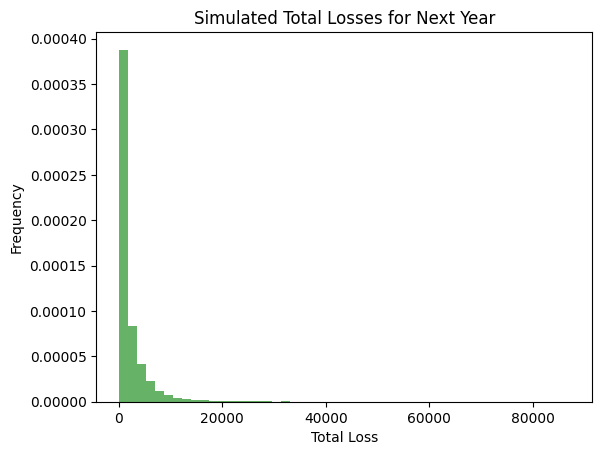

Simulated Total Losses - Mean: 2000.5555337452777
Simulated Total Losses - Std Dev: 3676.914082236124
KS Test for Log-Normal Distribution - Statistic: 0.2307185397172155 P-value: 5.315203177357836e-172
KS Test for Gamma Distribution - Statistic: 0.24645803383389342 P-value: 1.5089949709438602e-196
Best fit distribution: lognorm with parameters: (1.1596764669034225, 0, 969.7229460522528)


In [ ]:
# Estimate severity distribution (Log-Normal)
claim_severity = claim_data['ClaimAmount']
shape, loc, scale = stats.lognorm.fit(claim_severity, floc=0)

# Print estimated parameters
print("Estimated Log-Normal parameters for severity distribution:")
print("Shape:", shape)
print("Loc:", loc)
print("Scale:", scale)

# Simulate total losses for the next year
num_simulations = 10000
total_losses = []

for _ in range(num_simulations):

    if var_claim_freq > mean_claim_freq:
        simulated_claims = np.random.negative_binomial(alpha_est, p_est)
    else:
        simulated_claims = np.random.poisson(alpha_est)
    
    simulated_severity = np.random.lognormal(np.log(scale), shape, simulated_claims)
    total_loss = simulated_severity.sum()
    total_losses.append(total_loss)

# Convert to numpy array
total_losses = np.array(total_losses)

# Plot 
plt.hist(total_losses, bins=50, density=True, alpha=0.6, color='g')
plt.title('Simulated Total Losses for Next Year')
plt.xlabel('Total Loss')
plt.ylabel('Frequency')
plt.show()

# Print basic stats for simulated total losses
print("Simulated Total Losses - Mean:", total_losses.mean())
print("Simulated Total Losses - Std Dev:", total_losses.std())

# Goodness-of-fit test for Log-Normal distribution
ks_stat_lognorm, p_value_lognorm = stats.kstest(claim_severity, 'lognorm', args=(shape, loc, scale))
print("KS Test for Log-Normal Distribution - Statistic:", ks_stat_lognorm, "P-value:", p_value_lognorm)

# Compare 
alpha_sev, loc_sev, beta_sev = stats.gamma.fit(claim_severity, floc=0)
ks_stat_gamma, p_value_gamma = stats.kstest(claim_severity, 'gamma', args=(alpha_sev, loc_sev, beta_sev))
print("KS Test for Gamma Distribution - Statistic:", ks_stat_gamma, "P-value:", p_value_gamma)

# Choose the best fit based on p-value
if p_value_lognorm > p_value_gamma:
    best_fit = 'lognorm'
    best_params = (shape, loc, scale)
else:
    best_fit = 'gamma'
    best_params = (alpha_sev, loc_sev, beta_sev)

print(f"Best fit distribution: {best_fit} with parameters: {best_params}")

According to the simulation of log-nomal distribution, the average total expected loss in a year would be 2000.56 with a standard deviation of 3676.91 while the gamma ditribution is 2195.63 and 3176.26, indicating a high degree of volatility in the total loss.
From the results of the Kolmogorov-Smirnov test, the lognormal distribution performs better than the gamma distribution in fitting the data (higher p-value). Lognormal distribution has a statistic value of 0.2307 and gamma distribution has a statistic value of 0.2465, both having lower P-value, which indicates that despite the fact that both are imperfect, the lognormal distribution has a relatively better fit .

